# Procesamiento de imágenes usando histogramas

**Def:** Sea A una magen a escala de grises. Entonces el histograma de una imagen es la representación de la frecuencia de aparición de cada uno de los niveles de gris en la imagen. (Cuántas veces se repite un color)

Se asume que A está en un formto de 8 bits $A(x,y) \in \{0,1,...,255\}$

Sea $h \in  {\rm I\!R}^{256}$, entonces:
$$
h(k) = n_k = card{(x,y)/A(x, y) = k}
$$
donde $k = 0,1,2, ..., 255$

Ejemplo: Consideremos la matriz $A \in {\rm I\!R}^{4 \times 4}$ tal que
$$
A = 
\left(
\begin{matrix}
0 & 5 & 3 & 1 \\
2 & 5 & 1 & 0 \\
0 & 2 & 4 & 1 \\
0 & 0 & 0 & 1 
\end{matrix}
\right)
$$
Queda claro que los valores que toma A, están en el conjunto  ${0,1,2,3,4,5}$
$$
\begin{matrix}
Rep & Rep \\
0 \rightarrow 6 & 3 \rightarrow 1 \\
1 \rightarrow 4 & 4 \rightarrow 1 \\
2 \rightarrow 2 & 5 \rightarrow 2 
\end{matrix}
$$
Por lo tanto $h = (6, 4, 2, 1, 1, 2)^T$

<img src="hist.svg" width="200">


## Código en Octave

m =  200
n =  200
t1 =  0.97184
t2 =  0.15703
t3 =  0.36210


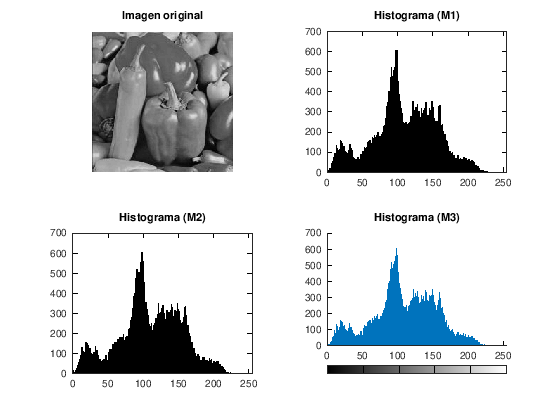

In [10]:
pkg load image

A = imread('Imagenes_5/peppers.jpg');
subplot(2,2,1)
imshow(A)
title('Imagen original')


# Forma 1 de calcular el histograma
h1 = zeros(256,1);
[m, n] = size(A)
tic
for x = 1:m
    for y = 1:n
        h1(A(x,y)+1) = h1(A(x,y)+1)+1;
    end
end
t1 = toc
subplot(2,2,2)
bar(0:255, h1)
title("Histograma (M1)")
xlim([0 255])


# Forma 2 de calcular el histograma
h2 = zeros(256,1);
tic
for i = 0:255
    h2(i+1) = sum(sum(A==i));
end
t2 = toc
subplot(2,2,3)
bar(0:255, h2)
title("Histograma (M2)")
xlim([0 255])

# Forma 3 de calcular el histograma

subplot(2,2,4) 
tic
imhist(A);% Comando de Octave para calcular el histograma
t3 = toc
title("Histograma (M3)")

## Código en Python

m =  200
n =  200
t1 =  0.03490495681762695
t1 =  0.015956640243530273
t1 =  0.0009970664978027344


Text(0.5, 1.0, 'Histograma (M3)')

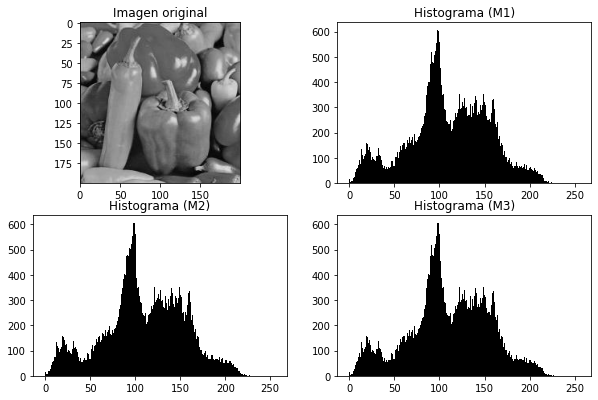

In [85]:
from PIL import Image, ImageOps  
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
import time

fig, axs = plt.subplots(2,2, figsize=(10, 6.5))
axs[0,0].set_title("Imagen original")

A = Image.open(r'Imagenes_5/peppers.jpg')
A = np.uint8(asarray(A))

axs[0,0].imshow(np.repeat(A[:, :, np.newaxis], 3, axis=2))

# Forma 1 de calcular el histograma
h1 = np.zeros(256);
m, n = A.shape
print("m = ", m)
print("n = ", n)
tic = time.time()
for x in range(0,m):
    for y in range(0, n):
        h1[A[x,y]] += 1;
toc = time.time() - tic
print("t1 = ",toc)
axs[0,1].bar(np.linspace(0, 255, 256),h1, width = 1, color = 'k')
axs[0,1].set_title("Histograma (M1)")

# Forma 2 de calcular el histograma
h2 = np.zeros(256);
tic = time.time()
for i in range(0,255):
    h2[i] = np.sum(A==i)
toc = time.time() - tic
print("t1 = ",toc)
axs[1,0].bar(np.linspace(0, 255, 256), h2, width = 1, color = 'k')
axs[1,0].set_title("Histograma (M2)")

# Forma 3 de calcular el histograma
tic = time.time()
h3 = np.histogram(A, bins=256, range=(0,255))[0]
toc = time.time() - tic
print("t1 = ",toc)
axs[1,1].bar(np.linspace(0, 255, 256), h3, width = 1, color = 'k')
axs[1,1].set_title("Histograma (M3)")

## Técnicas para modificar imágenes con histogramas

1. **Ecualización de histograma**
Esta técnica cambia la distribución de niveles de grises de una imagen, de tal manera que se obtiene un histograma uniforme, en el que el porcentaje de pixeles de cada nivel de gris es el mismo.

Para esto necesitamos una función auxiliar que satisface dos criterios
1. $T(A(x,y))$ tiene que ser una función creciente en [0,255]
1. $0 \leq T(A(x,y)) \leq 1$

Un ejemplo de este tipo de transformación, es la función de distribución acumulada (CDF)
$$
S_k = T(A(x,y)) = \sum _{j=0} ^k \frac{h(j)}{n} \rightarrow S=[S_0, S_1,..., S_{255}]
$$

Donde n es el número total de pixeles

**Ejemplo:** $h = [1,3,2,4]$. El vector acumulado es:
$$
a = [\frac{1}{4},\frac{4}{4},\frac{6}{4},\frac{10}{4}] = [\frac{1}{4},1,\frac{3}{2},\frac{5}{2}]
$$

El métod de ecualización es modificar los pixeles de una image A(8 bits), por el valor multiplicado por $s_k \cdot 255$, es decir:

$$
B(x,y) = [S_k \cdot 255] \rightarrow Redondear\\
k = A(x,y)
$$

## Código en octave

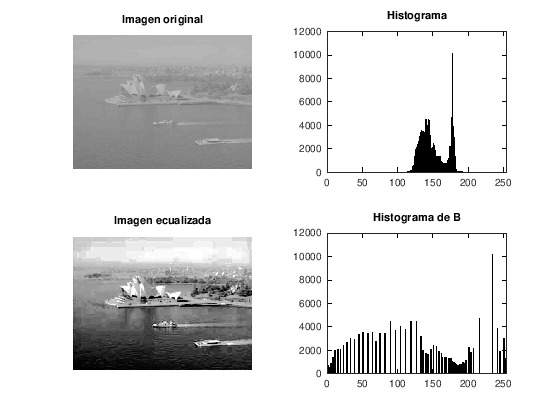

In [16]:
# Ecualización de una image
pkg load image

A = imread('Imagenes_5/sydney.jpg');
subplot(2,2,1)
imshow(A)
title('Imagen original')

# Calcular el histograma de A
h = zeros(256,1);
for i = 0:255
    h(i+1) = sum(sum(A==i));
end
subplot(2,2,2)
bar(0:255, h)
title("Histograma")
xlim([0 255])

# Distribución acumulada
ac = zeros(256,1);
[m,n] = size(A);
ac(1) = h(1);
for i = 1:255
    ac(i+1) = ac(i) + h(i+1);
end
ac = ac/(m*n);

# Obtener la nueva imagen aplicando la técnica de ecualización
B = zeros(m,n);
A = double(A);

for x = 1:m
    for y = 1:n
        B(x, y) = round(ac(A(x,y)+1)*255);
    end    
end

B = uint8(B);
subplot(2,2,3)
imshow(B)
title("Imagen ecualizada")

# Calcular el histograma de B
h2 = zeros(256,1);
for i = 0:255
    h2(i+1) = sum(sum(B==i));
end
subplot(2,2,4)
bar(0:255, h2)
title("Histograma de B")
xlim([0 255])


## Código en Python

<BarContainer object of 256 artists>

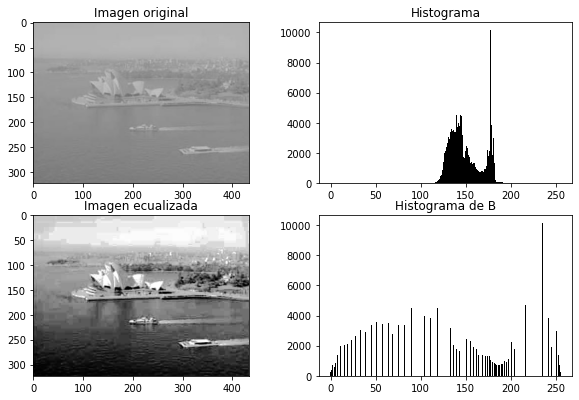

In [86]:
# Ecualización de una image
from PIL import Image  
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray

fig, axs = plt.subplots(2,2, figsize=(10, 6.5))
axs[0,0].set_title("Imagen original")

A = Image.open(r'Imagenes_5/sydney.jpg')
A = np.uint8(asarray(A))

axs[0,0].imshow(np.repeat(A[:, :, np.newaxis], 3, axis=2))
h = np.histogram(A, bins=256, range=(0,255))[0] # Cálculo de histograma

axs[0,1].set_title("Histograma")
axs[0,1].bar(np.linspace(0, 255, 256), h, width = 1, color = 'k')
# Distribución acumulada

m, n = A.shape;
ac = np.zeros(256)
ac[0] = h[0]
for i in range(1,255):
    ac[i] = ac[i-1] + h[i]

ac /= m*n

# Obtener nueva imagen aplicando técnica de ecualización
B = np.zeros((m, n))

for x in range(0, m):
    for y in range(0,n):
        B[x,y] = round(ac[A[x,y]]*255)
B = np.uint8(B)

axs[1,0].set_title("Imagen ecualizada")
axs[1,0].imshow(np.repeat(B[:, :, np.newaxis], 3, axis=2))
h1 = np.histogram(B, bins=256, range=(0,255))[0] # Cálculo de histograma

axs[1,1].set_title("Histograma de B")
axs[1,1].bar(np.linspace(0, 255, 256), h1, width = 1, color = 'k')
    

2. **Estiramiento del Histograma**: Esta técnica consiste en una transformación lineal que expande parte del histograma original, tal que la intensidad original que está en $[r_{min}, r_{max}]$, ocupe toda la escala $[0,255]$. (Se normalizan los valores entre $[r_{min}, r_{max}]$ al rango $[0,255]$.)

Matemáticamente, cada pixel de la nueva imagen B se obtiene de la fórmula

$$
B(x,y) = \frac{255}{r_{max} - r_{min}}(A(x,y)- r_{min})
$$

donde $r_{min}, r_{max}$ son los valores más pequeño y más grande en escala de grises de la imagen A.

## Código en Octave

r_min =  107
r_max =  202


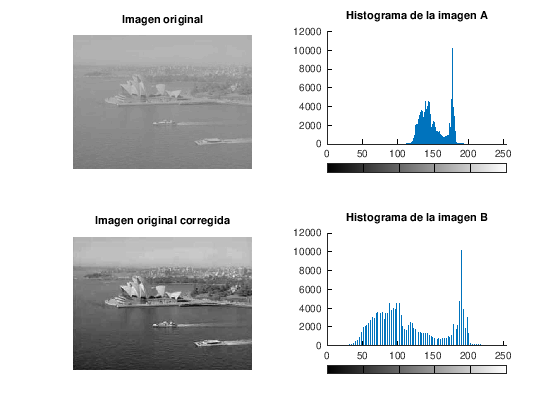

In [2]:
# Estiramiento del histograma
pkg load image
A = imread('Imagenes_5/sydney.jpg');
subplot(2,2,1)
imshow(A)
title('Imagen original')

subplot(2,2,2)
imhist(A)
title('Histograma de la imagen A')

A = double(A);
r_min = min(min(A))
r_max = max(max(A))

B = uint8((255*(A-r_min)/(r_max-r_min)));

subplot(2,2,3)
imshow(B)
title('Imagen original corregida')

subplot(2,2,4)
imhist(B)
title('Histograma de la imagen B')


## Código en Python

<BarContainer object of 256 artists>

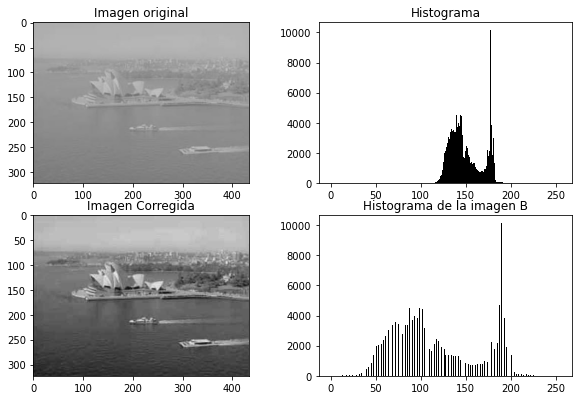

In [110]:
# Estiramiento del histograma
from PIL import Image  
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray

fig, axs = plt.subplots(2,2, figsize=(10, 6.5))
axs[0,0].set_title("Imagen original")

A = Image.open(r'Imagenes_5/sydney.jpg')
A = np.uint8(asarray(A))

axs[0,0].imshow(np.repeat(A[:, :, np.newaxis], 3, axis=2))
h = np.histogram(A, bins=256, range=(0,255))[0] # Cálculo de histograma

axs[0,1].set_title("Histograma")
axs[0,1].bar(np.linspace(0, 255, 256), h, width = 1, color = 'k')

r_min = np.min(A)
r_max = np.max(A)

# Estiramiento del histograma
B = np.uint8((A-r_min)/(r_max-r_min)*255)

axs[1,0].set_title("Imagen Corregida")
axs[1,0].imshow(np.repeat(B[:, :, np.newaxis], 3, axis=2))
h1 = np.histogram(B, bins=256, range=(0,255))[0] # Cálculo de histograma

axs[1,1].set_title("Histograma de la imagen B")
axs[1,1].bar(np.linspace(0, 255, 256), h1, width = 1, color = 'k')


3. **Reducción del histograma:** Esta técnica modifica el histograma original, de tal manera que comprime la dinámica de escala de grises $[r_{min}, r_{max}]$ a otra escala $[s_{min}, s_{max}]$ deonde $r_{min}< s_{min}, s_{max}< r_{max}$.

Matemáticamente, cada pixel $B_{i,j}$ de la imagen B modificada se obtiene de la fórmula

$$
B(x,y) = \left[\frac{s_{max}- s_{min}}{r_{max}- r_{min}}\right](A(x,y) - r_{min}) + s_{min}
$$

## Código en Octave

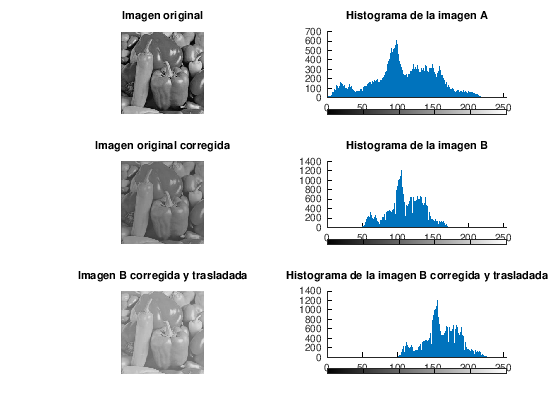

In [113]:
pkg load image
A = imread('Imagenes_5/peppers.jpg');
subplot(3,2,1)
imshow(A)
title('Imagen original')

subplot(3,2,2)
imhist(A)
title('Histograma de la imagen A')

A = double(A);
r_min = min(min(A)); 
r_max = max(max(A));
s_min = r_min+50; % s_min debe ser más grande que r_min
s_max = r_max-50; % s_max debe ser más pequeño que r_max

% Operación de estiramiento
B = ((s_max-s_min)/(r_max-r_min))*(A-r_min) + s_min;
B = uint8(B);
subplot(3,2,3)
imshow(B)
title('Imagen original corregida')

subplot(3,2,4)
imhist(B)
title('Histograma de la imagen B')

B = B+51;
subplot(3,2,5)
imshow(B)
title('Imagen B corregida y trasladada')

subplot(3,2,6)
imhist(B)
title('Histograma de la imagen B corregida y trasladada')

## Código en Python

<BarContainer object of 256 artists>

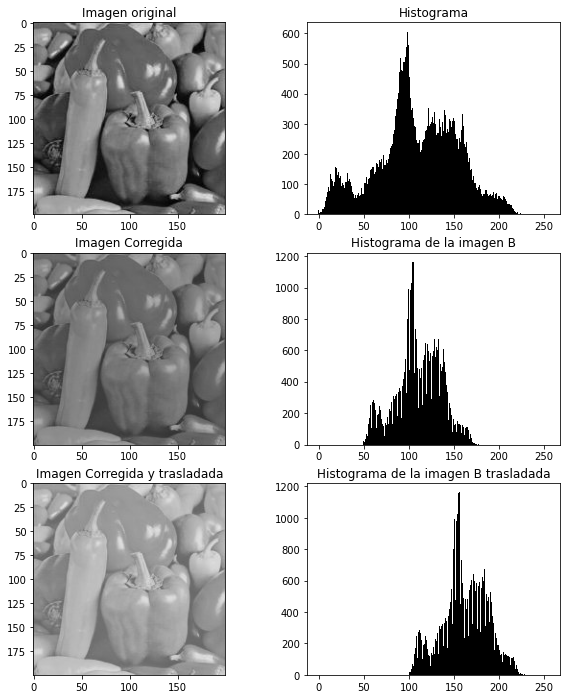

In [117]:
# Reducción del histograma
from PIL import Image  
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray

fig, axs = plt.subplots(3,2, figsize=(10, 12))

A = Image.open(r'Imagenes_5/peppers.jpg')
A = np.uint8(asarray(A))

axs[0,0].set_title("Imagen original")
axs[0,0].imshow(np.repeat(A[:, :, np.newaxis], 3, axis=2))
h = np.histogram(A, bins=256, range=(0,255))[0] # Cálculo de histograma

axs[0,1].set_title("Histograma")
axs[0,1].bar(np.linspace(0, 255, 256), h, width = 1, color = 'k')

r_min = np.min(A)
r_max = np.max(A)
s_min = r_min + 50
s_max = r_max - 50

# Opereción de estiramiento
B = np.uint8(((s_max - s_min)/(r_max-r_min))*(A-r_min) + s_min)

axs[1,0].set_title("Imagen Corregida")
axs[1,0].imshow(np.repeat(B[:, :, np.newaxis], 3, axis=2))
h1 = np.histogram(B, bins=256, range=(0,255))[0] # Cálculo de histograma

axs[1,1].set_title("Histograma de la imagen B")
axs[1,1].bar(np.linspace(0, 255, 256), h1, width = 1, color = 'k')

C = B + 51
axs[2,0].set_title("Imagen Corregida y trasladada")
axs[2,0].imshow(np.repeat(C[:, :, np.newaxis], 3, axis=2))
h2 = np.histogram(C, bins=256, range=(0,255))[0] # Cálculo de histograma

axs[2,1].set_title("Histograma de la imagen B trasladada")
axs[2,1].bar(np.linspace(0, 255, 256), h2, width = 1, color = 'k')


4. **Histogram matching (coincidencia de histograma)**

ESta técnica convierte una imagen para que tenga el comportamiento de un histograma particular. Este procedimiento se puede dividir en 3 pasos:
1. Ecualizar el histograma de la imagen original $h_1(m) = y$
1. Ecualizar el histograma especificado *(Puede ser a través de otra imagen)*: $h_2(n) = y'$
1. Relacionar los 2 histogramas, $h_1(m) = h_2(n) $
    *Note que:* 
$$
    \begin{matrix}
       y' = h_2(n)& \Rightarrow & n = h_2 ^{-1}(y') \\
                  & \Rightarrow & n = h_2 ^{-1}(h_1(m))
    \end{matrix}
$$

En el caso de imágenes, no se conoce la función inversa del histograma.

Para este caso, trabajaremos con un método alternativo que involucra la distribución acumulada de ambos histrogramas. (normalizado)

Sea H1 y H2, las distribuciones acumuladas de los histogramas h1 y h2, respectivamente

Entonces, la intensdad de gris $m \in {0,1,..,255}$ de la imagen A se cambiará por la intensidad que minimice la distancia de las distribuviones acumuladas, es decir, seleccionar n talque:

$$
|H_1(m)-H_2(n)| = \min _{k = 0,1,...,255}|H_1(m)-H_2(k)|
$$

y en este caso, $m\rightarrow n$. Si hay varios valores que se repiten, entonces se suman dichos valores.


## Código en Octave

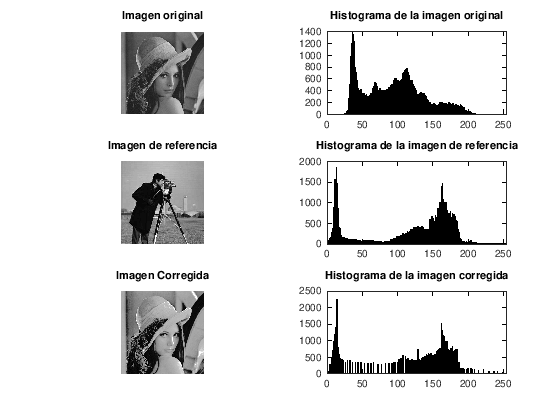

In [1]:
pkg load image

# Calcular el histograma de B
function h = calcHistograma(img)
    h = zeros(256,1);
    for i = 0:255
        h(i+1) = sum(sum(img==i)); 
    end
endfunction

# Distribución acumulada
function ac = distAc(img, h)
    ac = zeros(256,1);
    [m,n] = size(img);
    ac(1) = h(1)/ (m*n);
    for i = 1:255
        ac(i+1) = ac(i) + h(i+1);
    end
    ac = ac/(m*n);
endfunction

A = imread('Imagenes_5/lena.jpg'); % Se selecciona canal 1
A = rgb2gray(A);
subplot(3,2,1)
imshow(A)
title('Imagen original')

subplot(3,2,2)
hA = calcHistograma(A); % Histograma de A
bar(0:255, hA)
title('Histograma de la imagen original')
xlim([0 255])

acA = distAc(A, hA);    % Frecuencia acumulada de A

B = imread('Imagenes_5/camarografo.jpg');
subplot(3,2,3)
imshow(B)
title('Imagen de referencia')

subplot(3,2,4)
hB = calcHistograma(B); % Histograma de B
bar(0:255, hB)
title('Histograma de la imagen de referencia')
xlim([0 255])

acB = distAc(A, hB);    % Frecuencia acumulada de B
z = zeros(256,1);

for i = 1:256
    tmp = (acB - acA(i)).^2; % Resta y eleva al cuadrado para encontrar el mínimo
    minim = min(min(tmp)); % Encuentra el valor del mínimo
    tmp = tmp == minim; % Identifica las posiciones del minimo
    z(i) = find(tmp,1); %asigna a z(i), la posición del mínimo
end

[n, m] = size(A);
C = zeros(n, m);
for x = 1:n
    for y = 1:m
        C(x,y) = z(A(x,y)); % Reemplaza los valores de C(x,y), con el mini
    end
end
C = uint8(C);
subplot(3,2,5)
imshow(C);
title('Imagen Corregida')

subplot(3,2,6)
hC = calcHistograma(C); % Histograma de B
bar(0:255, hC)
title('Histograma de la imagen corregida')
xlim([0 255])